In [213]:
# %pip install matplotlib

In [214]:
# %pip install seaborn

In [215]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)



In [216]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, ShuffleSplit,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import GridSearchCV

### Exploratory Data Analysis (EDA)

In [217]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [218]:
data.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


### Observation No.1 
* This Dataset has 9 columns
* check data.info()

In [219]:
## Check Data Overview

data.shape
print(f'The Dataset has {data.shape[0]} rows and {data.shape[1]} ')

The Dataset has 13320 rows and 9 


In [220]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Observation No-2 
* The Dataset has 9 columns
* The Dataset has 13320
* The Dataset has 3 Numerical columns and 6 Categorical Column.
* Society has mostly null Values 

In [222]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Observation No-3 
* Mean of Bath column is 2.69, standard Deviation of bath column is 1.34, minimum value of bath column is 1, Maximum value of bath column is 40. 

* Mean of Balcony column is 1.58 , standard Deviation of balcony  column is 0.81 , minimum value of bath column is 1, Maximum value of balcony column is 30. 

* Mean of Price column is 112.56, standard Deviation of Price column is 148.971 , minimum value of bath column is 1, Maximum value of Price column is 3600. 



### Explore the Categorical Columns one by one 

In [223]:
data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [224]:
df = data

df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [225]:
df['availability'].nunique() ## No. of unqiue values 
print(df['availability'].unique())

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']


In [226]:
print('No of unique of values in location', df['location'].nunique())
print('No of unique of values in location', df['society'].nunique())
print('No of unique of values in location', df['total_sqft'].nunique())

No of unique of values in location 1305
No of unique of values in location 2688
No of unique of values in location 2117


In [227]:
print("No of unique values in size ",df['size'].nunique())
df['size'].unique()

No of unique values in size  31


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Observation No.4 
* Super built-up Area has the highest number of houses 8790.
* Plot Area has 2418 
* Built-up Area has 2025 no. of houses. 
* Carpet Area has low number of houses 87. 
 --------------
* There are 81 unique values in availability column. 
* This column has details about the availability of the house. 
----------------
* there are 1305 unique values in location column.
* this column has details about the location of the house. 
* There are 2688 unique values in society column. 
* Total_sqft column has 2117 unique values. 
* Total_sqft column look life numeraic column but its object column. 
* Check the detail about the total_sqft column. 
------------
* There are 31 unique values in size column. 
* This column has Details about the size of the house how many rooms in it. 


In [228]:
df.isnull().sum().sort_values(ascending = False)

society         5502
balcony          609
bath              73
size              16
location           1
area_type          0
availability       0
total_sqft         0
price              0
dtype: int64

* Drop The unnecessary Columns.
* Like Avalability society columns.
* Avalability is no matter for price prediction
* Society is no matter and it has many missing values 
* de-bug Null Values

In [229]:
df = df.drop(['availability','society', 'area_type', 'balcony'], axis = 1)

In [230]:
## drop
df.dropna()
df.shape

(13320, 5)

In [231]:
df.isnull().sum()

# df['bath'] = df['bath'].fillna(df['bath'].median())
# data['bath'] = data['bath'].fillna(data['bath'].median())

df['size'] = df['size'].fillna('2 BHK')

In [232]:
df.isnull().sum()


location       1
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [233]:
df.dropna(inplace =  True)

In [234]:
df.isnull().sum()
df.shape

(13246, 5)

In [235]:
df['total_sqft'].unique()

def convert_Into (x):
  temp = x.split('-')
  
  if len(temp) == 2:
    return float(temp[0]) + float(temp[1]) / 2 
  
  try: 
    return float(x)
  except : 
    return None 

In [236]:
df['total_sqft']= df['total_sqft'].apply(convert_Into)

In [237]:
df['size'].value_counts()
df['size']= df['size'].str.split().str.get(0).astype(int)

In [238]:
df['bhk'] = df['size']
df = df.drop('size', axis=1 )

In [239]:
df.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4


In [240]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [241]:
loc = df['location'].value_counts()
print(len(loc[loc>10]))
print(len(loc[loc<=10]))
loc_less_10 = loc[loc <= 10].index.tolist()
df['location'] = df['location'].apply(lambda x: 'other' if x in loc_less_10 else x)
df['location'].nunique()


241
1063


242

In [242]:
df[df['total_sqft']/df['bhk']<300].head()

,location,total_sqft,bath,price,bhk
9,other,1020.0,6.0,370.0,6
45,HSR Layout,600.0,9.0,200.0,8
58,Murugeshpalya,1407.0,4.0,150.0,6
68,other,1350.0,7.0,85.0,8
70,other,500.0,3.0,100.0,3


In [243]:
df= df[~(df['total_sqft']/df['bhk']<300)]

In [244]:
df.describe()

,total_sqft,bath,price,bhk
count,12456.000000,12502.000000,12502.000000,12502.000000
mean,1598.841548,2.564790,111.311915,2.650696
std,1269.660904,1.084946,152.089966,0.981698
min,300.000000,1.000000,9.000000,1.000000
25%,1118.000000,2.000000,49.000000,2.000000
50%,1300.000000,2.000000,70.000000,3.000000
75%,1702.250000,3.000000,115.000000,3.000000
max,52272.000000,16.000000,3600.000000,16.000000


In [245]:
# df['location'].unique()

### Data visulation 

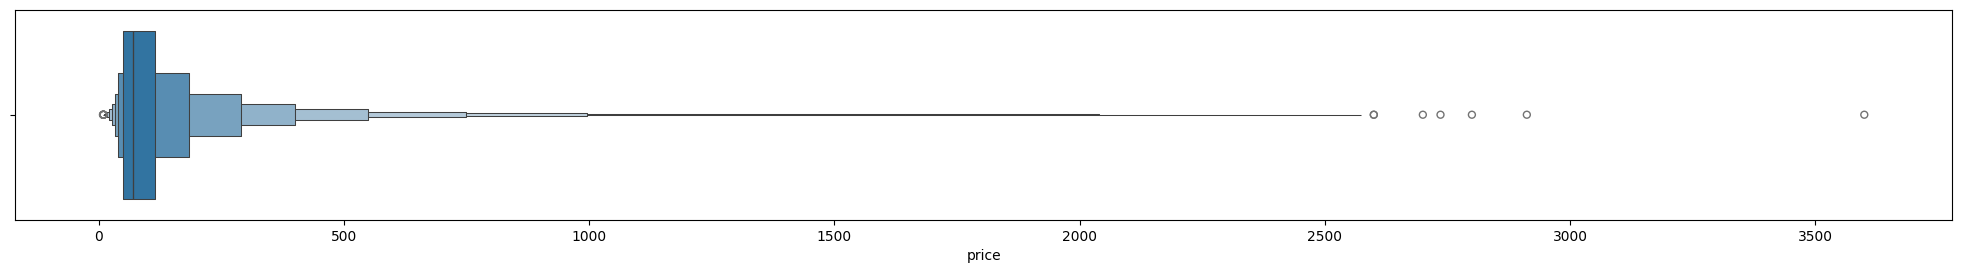

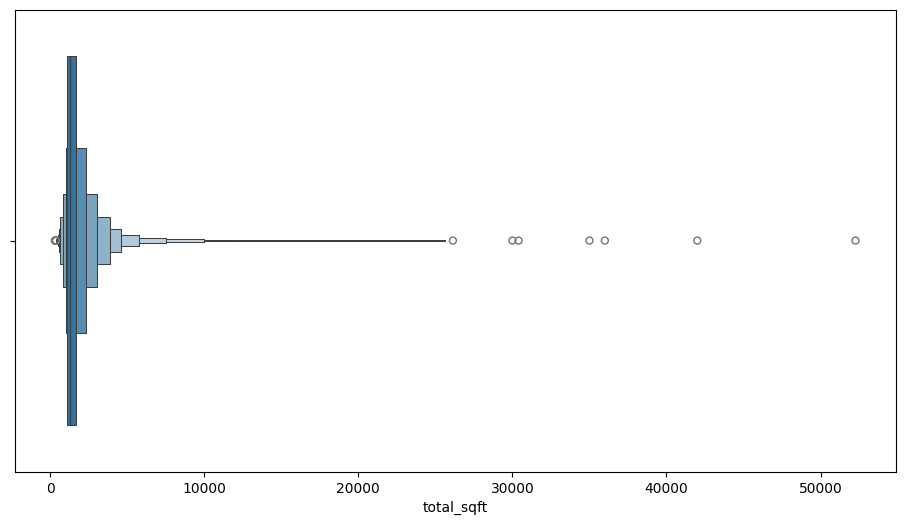

In [246]:
plt.figure(figsize=(25,6)) ## figures 
plt.subplot(2,1,1)
sns.boxenplot(x = df['price'])
plt.show()

plt.figure(figsize=(25,6))
plt.subplot(1,2,2)
sns.boxenplot(x=df['total_sqft'])
plt.show()

In [247]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1 
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)] 
# This is the code to select items in range of q1 and q3 

# vo price jo lower_bound se badde ho ; vo price jo q3 se chote hai 


In [248]:
df['price'].shape

(11231,)

In [249]:
Q1 = df['total_sqft'].quantile(0.25)
Q3 = df['total_sqft'].quantile(0.75)
IQR = Q3 - Q1 
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR 

df = df[(df['total_sqft'] >= Lower_bound) & (df['total_sqft'] <= Upper_bound)]

In [250]:
df['total_sqft'].shape
df.shape

(10580, 5)

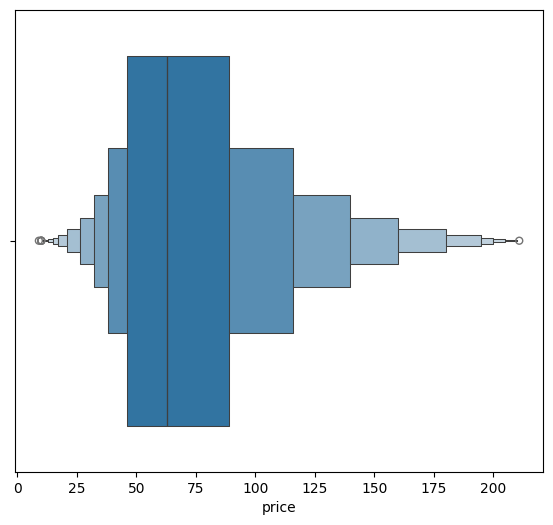

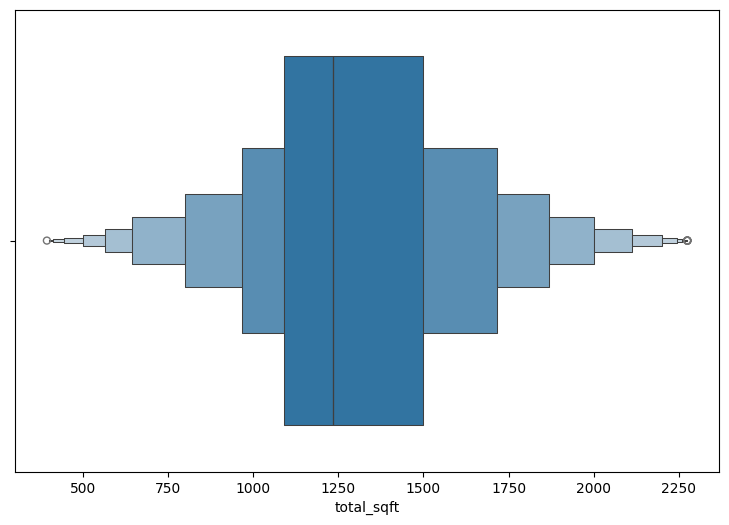

In [251]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxenplot(x = df['price'])
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.boxenplot(x = df['total_sqft'])
plt.show()

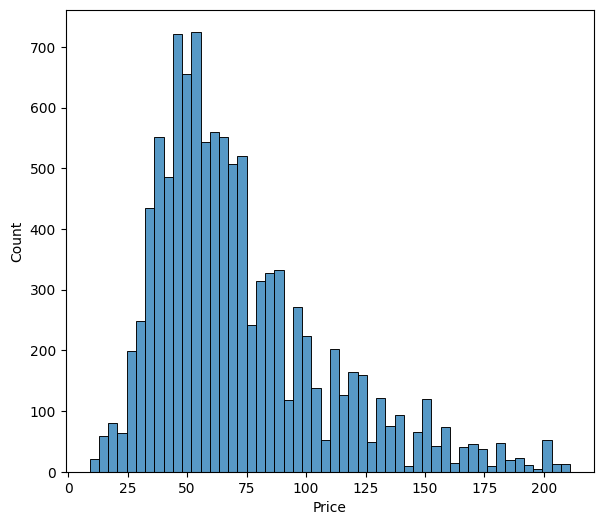

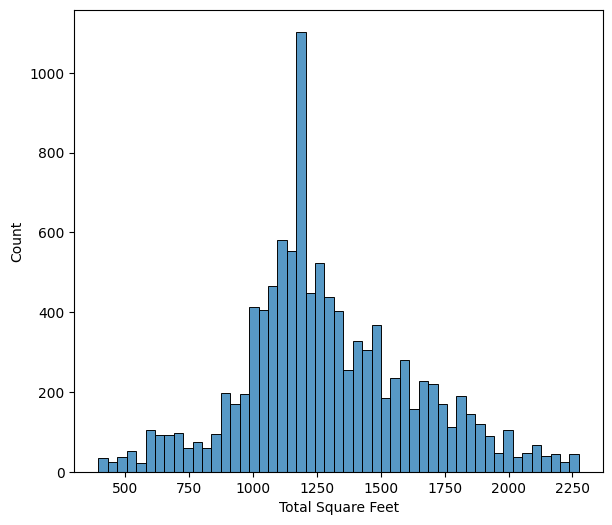

In [252]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x = df['price'])
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
sns.histplot(x = df['total_sqft'])
plt.xlabel('Total Square Feet')
plt.show()

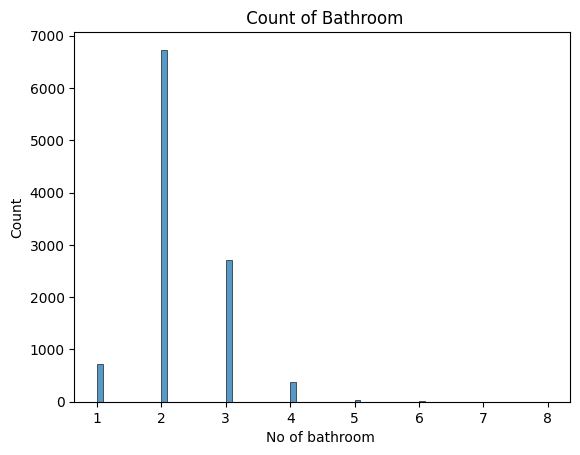

In [253]:
sns.histplot(x = df['bath'])
plt.title(' Count of Bathroom')
plt.xlabel('No of bathroom ')
plt.show()


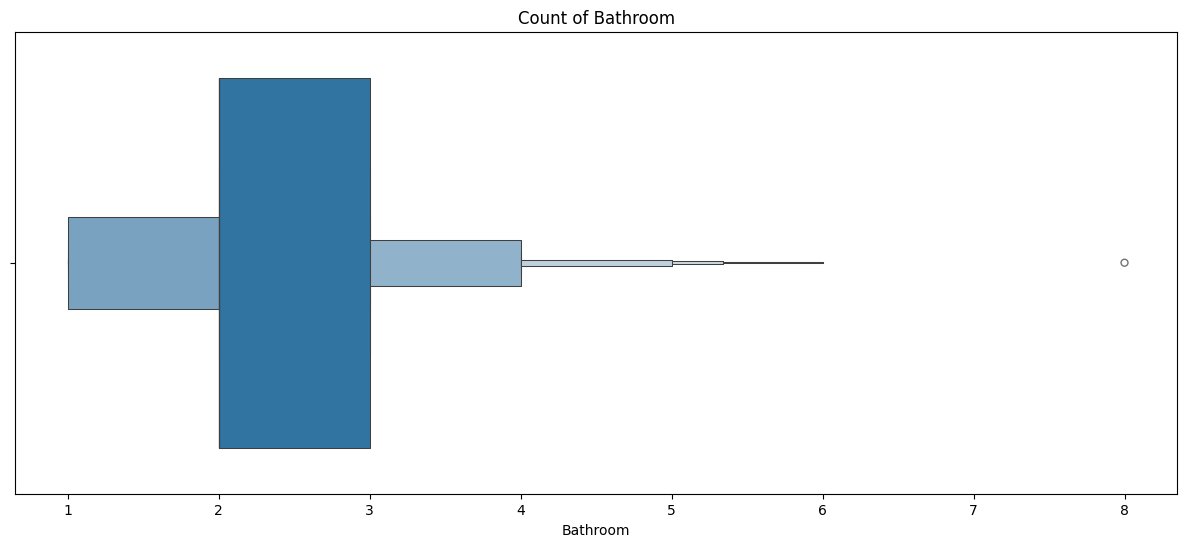

In [254]:
plt.figure(figsize=(15,6))
sns.boxenplot(x = df['bath'])
# sns.histplot(x = df['bath'])
plt.title('Count of Bathroom')
plt.xlabel('Bathroom')
plt.show()

In [255]:
df.head()
df = df[df['bath'] < df['bhk'] + 2] 
## keep the row only where the numbers of bath are less then bhk value + 2 
## like = bhk = 3 + 2 = 5 then bathroom should be less 
   

In [256]:
df.shape
df.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3


In [257]:
# dummies = pd.get_dummies(df.location)
## Converts categorical location names = into one-hot encoded columns [binary variables]

## Each Unique Location in df becomes a separate column  with 0 or 1, indicating whether a row belongs to that location. .


# dummies.head(3)

## hamare pass 50 locations hai maanlo 50 options , toh abhi har row me 1 saath sab options toh correct nahi ho sakte , so jo use row m selected hoga vo, true hoga bakki sab false ..... 




In [258]:
# df = pd.concat([df, dummies.drop('other', axis='columns')], axis=1)
# df.drop('location', axis=1, inplace=True)  


# Drop original text column

# pd.concat() --> merging Data-frames 
## This fucntion is used to Combine Multiple Dataframes
### Removing an Unnecessary Column 
#### Axis = 1 --> Column - Wise Concatenation
##### dummies was created using pd.get_dummies(df.location), so it contains one-hot encoded columns for different locations



In [259]:
# df = df.drop(columns='location', axis= 1)
df.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3


In [260]:
df.shape

(10565, 5)

In [261]:
clean_data = df

In [262]:
clean_data.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3


## Model Training



In [263]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [264]:
clean_data.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3


In [265]:
df.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3


In [268]:
x = df.drop(columns=['price'])
y = df['price']


In [269]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(8452, 4)
(8452,)
(2113,)
(2113, 4)


### Applying Linear Regression 

In [277]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['location']),
    remainder='passthrough'
)



In [278]:
scaler = StandardScaler()
lr = LinearRegression()

In [279]:
pipe = make_pipeline(column_trans,scaler,lr)

In [280]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [281]:
y_pred = pipe.predict(x_test)

In [282]:
r2_score(y_test,y_pred)

0.6043645071812243

### Applying Lasso 

In [283]:
lasso = Lasso()
pipe = make_pipeline(column_trans,scaler,lasso)
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [284]:
y_pred_lasso = pipe.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.5513032750383922

### Apply ridge 

In [285]:
ridge = Ridge()
pipe = make_pipeline(column_trans,scaler,ridge)
pipe.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [286]:
y_pred_ridge = pipe.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.6043660393897483

In [288]:
# %pip install pickle 

In [294]:
# %pip install streamlit 

In [292]:
import pickle 
pickle.dump(df,open('data.pkl','wb'))
pickle.dump(pipe,open('prediction.pkl','wb'))

In [ ]:
# numeric_features = ['total_sqft', 'bath', 'bhk']    # All numeric columns
# categorical_features = ['location']              
#   # Categorical column
# target = 'price'


In [ ]:
# X = clean_data[numeric_features + categorical_features]
# y = clean_data[target]

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Preprocessing
# preprocessor = ColumnTransformer([
#   ('num', StandardScaler(), numeric_features), 
#   ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
# ])

# # # Models
# # models = {
# #   'Ridge': Ridge(alpha=1.0),
# #   'Lasso': Lasso(alpha=0.01),
# #   'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5)
# # }

# # # Train and evaluate
# # for name, model in models.items():
# #     pipeline = Pipeline([
# #         ('preprocessing', preprocessor),
# #         ('regressor', model)
# #     ])
# #     pipeline.fit(x_train, y_train)
# #     y_pred = pipeline.predict(x_test)
# #     r2 = r2_score(y_test, y_pred)
# #     print(f"\nModel: {name}")
# #     print(f"R² Score: {r2:.4f}")


Model: Ridge
R² Score: 0.5764

Model: Lasso
R² Score: 0.5629

Model: ElasticNet
R² Score: 0.5309


In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# pipeline = Pipeline([
#     ('preprocessing', preprocessor),
#     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
# ])

# pipeline.fit(x_train, y_train)
# y_pred = pipeline.predict(x_test)
# r2 = r2_score(y_test, y_pred)
# print(f"RandomForest R² Score: {r2:.4f}")


RandomForest R² Score: 0.5753


In [ ]:
# ### Import Linear Regression 
# from sklearn.metrics import r2_score

# lr_clf = LinearRegression()
# lr_clf.fit(x_train,y_train)
# y_pred = lr_clf.predict(x_test)
# r2_score(y_test,y_pred)



In [ ]:
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score

# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# cross_val_score(LinearRegression(),X, y , cv = cv )

array([0.60467679, 0.58488323, 0.56985516, 0.56616461, 0.56879337])

In [ ]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.tree import DecisionTreeRegressor
# import pandas as pd

# def find_best_model_using_gridsearchcv(X, y):
#     algos = {
#         'linear_regression': {
#             'model': LinearRegression(),
#             'params': {
#                 'fit_intercept': [True, False]
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1, 2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion': ['squared_error', 'friedman_mse'],  # Updated 'mse' to 'squared_error'
#                 'splitter': ['best', 'random']
#             }
#         }
#     }
    
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# # Example usage:
# result = find_best_model_using_gridsearchcv(X, y)
# result

,model,best_score,best_params
0,linear_regression,0.578875,{'fit_intercept': True}
1,lasso,0.476276,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.440468,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
# def predict_price(location,sqft,bath,bhk):    
#     loc_index = np.where(X.columns==location)[0][0]

#     x = np.zeros(len(X.columns))
#     x[0] = sqft
#     x[1] = bath
#     x[2] = bhk
#     if loc_index >= 0:
#         x[loc_index] = 1

#     return lr_clf.predict([x])[0]

In [ ]:
# predict_price('1st Phase JP Nagar',1000, 2, 2)


np.float64(91.42369888763714)